# Inspect unbiased session data from `ibldata`

In [1]:
import datajoint as dj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bfdm.ibldata import load_session_list_csv, get_unbiased_data
from bfdm.iblmodel import fit_ibl

In [2]:
SESSION_LIST_FPATH = '../data/trained_sessions.csv'

In [3]:
# Connect to IBL database via DataJoint
dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'ibldemo'
dj.config['database.password'] = 'sfn2019demo'
dj.conn()

Connecting ibldemo@datajoint-public.internationalbrainlab.org:3306


DataJoint connection (connected) ibldemo@datajoint-public.internationalbrainlab.org:3306

In [4]:
# Load list of trained sessions
s_list = load_session_list_csv(SESSION_LIST_FPATH)

# Download unbiased blocks from sessions
sessions = get_unbiased_data(s_list)


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-05-30 22:29:07


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-05-30 22:33:49


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-05-31 15:37:47


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-05-31 15:43:32


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-06-04 14:47:45


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:02120449-9b19-4276-a434-513886c2fb19
session_start_time:2019-06-05 20:43:00


KeyError! Missing required field: 'trial_stim_contrast_right'
subject_uuid:021204

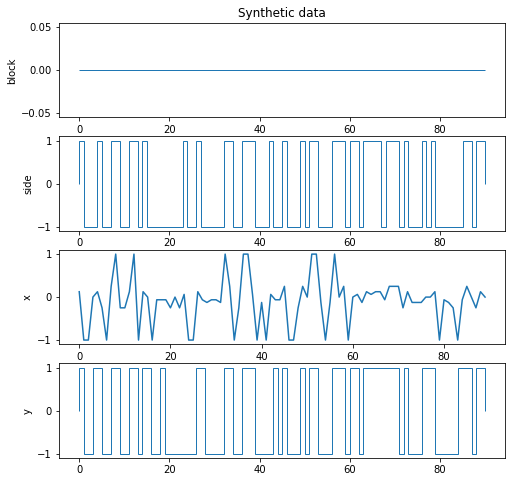

In [11]:
# Select session to plot
s = sessions[1]

(fig, ax) = plt.subplots(4, 1, figsize=(8, 8))

ax[0].stairs(s.b)
ax[0].set_ylabel('block')

ax[1].stairs(s.s)
ax[1].set_ylabel('side')

ax[2].plot(s.x)
ax[2].set_ylabel('x')

ax[3].stairs(s.y)
ax[3].set_ylabel('y')

ax[0].set_title('Synthetic data');

In [9]:
len(sessions)

3512

In [10]:
len(s_list)

3813

In [18]:
sum_y = 0
for s in sessions:
    sum_y += np.sum(s.y)

print(sum_y)


-5220.0


In [17]:
sum_s = 0
for s in sessions:
    sum_s += np.sum(s.s)

print(sum_s)


-138.0


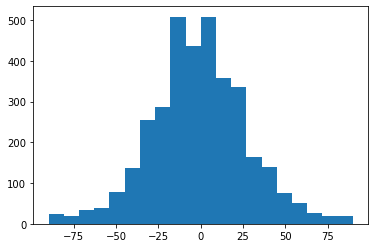

In [30]:
sum_y = [np.sum(s.y) for s in sessions]

plt.hist(sum_y, 20);


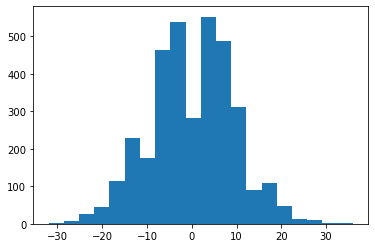

In [31]:
sum_s = [np.sum(s.s) for s in sessions]

plt.hist(sum_s, 20);


In [27]:
np.mean(sum_y)

-1.4863325740318907